Differential Evolution Globabal Optimisation
============================================

Knowledge 
- https://en.wikipedia.org/wiki/Differential_evolution

Basic example with rosenbrock
-----------------------------

In [1]:
from scipy.optimize import rosen, differential_evolution
bounds = [(0,2), (0, 2)]
result = differential_evolution(rosen, bounds)
result.x, result.fun


(array([1., 1.]), 0.0)

In [2]:
import sys
sys.path.insert(0, '../')
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import differential_evolution, minimize, Bounds
from scipy.interpolate import interp1d

from silentsub.device import StimulationDevice
from silentsub.plotting import stim_plot
from silentsub.CIE import get_CIES026

sns.set_context('notebook')
sns.set_style('whitegrid')


Load the data with `StimulationDevice`
--------------------------------------

In [3]:
spds = pd.read_csv('../data/S2_corrected_oo_spectra.csv', index_col=['led','intensity'])
spds.index.rename(['Primary', 'Setting'], inplace=True)
spds.columns = pd.Int64Index(spds.columns.astype(int))

# list of colors for the primaries
colors = ['blueviolet', 'royalblue', 'darkblue', 'blue', 'cyan', 
          'green', 'lime', 'orange', 'red', 'darkred']

# instantiate the class
device = StimulationDevice(
    resolutions=[4095]*10,
    colors=colors,
    spds=spds,
    spd_binwidth=1)

Define optimisation problem
---------------------------

This is the 'basic' optimisation where we aim to maximise melanopic contrast whilst keeping cone contrast at zero.

In [4]:
class OptimisationProblem:
    def __init__(self, aopic):
        self.aopic = aopic

    def smlri_calculator(self, weights):
        '''Calculates a-opic irradiance for the given weights.
        The first 10 values in weights define the background
        spectrum and the second 10 values define the modulation'''
        background = weights[0:10]
        modulation = weights[10:20]
        bg_smlri = 0
        mod_smlri = 0
        for led in range(10):
            x = self.aopic.loc[led].index / 4095
            y = self.aopic.loc[led]
            f = interp1d(x, y, axis=0, fill_value='extrapolate')
            bg_smlri += f(background[led])
            mod_smlri += f(modulation[led])
        return (pd.Series(bg_smlri, index=self.aopic.columns, name='Background'),
                pd.Series(mod_smlri, index=self.aopic.columns, name='Modulation'))

    def objective_function(self, weights):
        '''Calculates negative melanopsin contrast for background
        and modulation spectra. We want to minimise this.'''
        bg_smlri, mod_smlri = self.smlri_calculator(weights)
        contrast = (mod_smlri.I-bg_smlri.I) / bg_smlri.I
        return -contrast

    def cone_contrast_constraint_function(self, weights):
        '''Calculates S-, M-, and L-opic contrast for background
        and modulation spectra. We want to this to be zero'''
        bg_smlri, mod_smlri = self.smlri_calculator(weights)
        contrast = np.array([(mod_smlri.S-bg_smlri.S) / bg_smlri.S,
                             (mod_smlri.M-bg_smlri.M) / bg_smlri.M,
                             (mod_smlri.L-bg_smlri.L) / bg_smlri.L])
        return contrast

    def weights_to_settings(self, weights):
        '''Turns weights to 12-bit STLAB settings.'''
        return ([int(val*4095) for val in res.x[0:10]],
                [int(val*4095) for val in res.x[10:20]])



Do optimisation
---------------

differential_evolution step 1: f(x)= inf


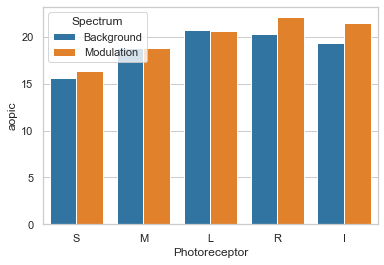

[ 0.71207826  0.83232641  0.43498701  0.51042265  0.23914869  0.25388264
  0.64169305  0.19333755  0.19303759  0.41018424  0.65671319  0.95785592
  0.57957054  0.31729699  0.7642066   0.09964327  0.53092313  0.14645546
  0.80544025  0.55082857]
differential_evolution step 2: f(x)= inf


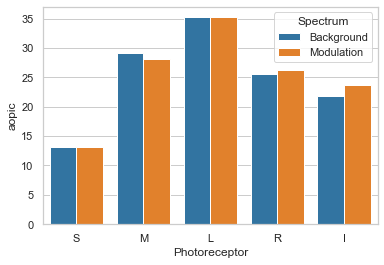

[ 0.67738105  0.56405469  0.48904058  0.26964942  0.2453846   0.80912083
  0.87000829  0.55445064  0.44697075  0.77159488  0.08177637  0.70110996
  0.62390605  0.44207591  0.66102612  0.73473522  0.38747883  0.9534275
  0.44017121  0.74885442]
differential_evolution step 3: f(x)= inf


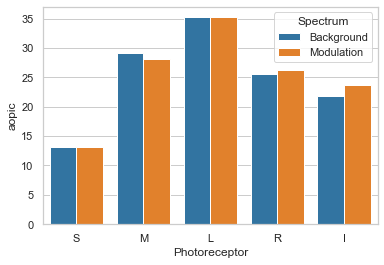

[ 0.67738105  0.56405469  0.48904058  0.26964942  0.2453846   0.80912083
  0.87000829  0.55445064  0.44697075  0.77159488  0.08177637  0.70110996
  0.62390605  0.44207591  0.66102612  0.73473522  0.38747883  0.9534275
  0.44017121  0.74885442]
differential_evolution step 4: f(x)= inf


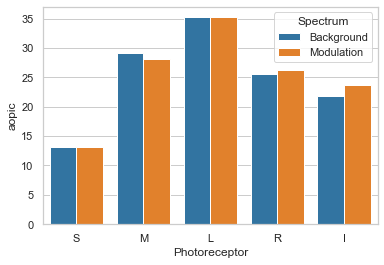

[ 0.67738105  0.56405469  0.48904058  0.26964942  0.2453846   0.80912083
  0.87000829  0.55445064  0.44697075  0.77159488  0.08177637  0.70110996
  0.62390605  0.44207591  0.66102612  0.73473522  0.38747883  0.9534275
  0.44017121  0.74885442]
differential_evolution step 5: f(x)= inf


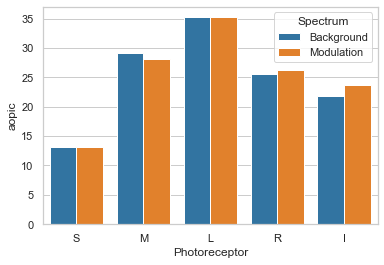

[ 0.67738105  0.56405469  0.48904058  0.26964942  0.2453846   0.80912083
  0.87000829  0.55445064  0.44697075  0.77159488  0.08177637  0.70110996
  0.62390605  0.44207591  0.66102612  0.73473522  0.38747883  0.9534275
  0.44017121  0.74885442]
differential_evolution step 6: f(x)= inf


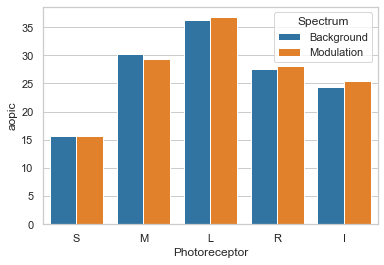

[ 0.8274564   0.64684905  0.69158845  0.31691306  0.32136833  0.75108725
  0.88749695  0.56781085  0.68744809  0.58285013  0.34923973  0.89430554
  0.79744455  0.21434778  0.89777724  0.63593291  0.4267372   0.9395464
  0.65777965  0.91573185]
differential_evolution step 7: f(x)= inf


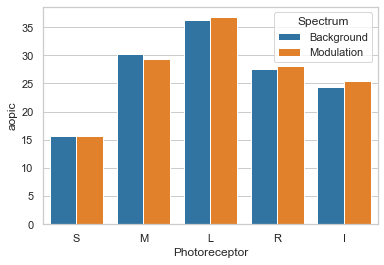

[ 0.8274564   0.64684905  0.69158845  0.31691306  0.32136833  0.75108725
  0.88749695  0.56781085  0.68744809  0.58285013  0.34923973  0.89430554
  0.79744455  0.21434778  0.89777724  0.63593291  0.4267372   0.9395464
  0.65777965  0.91573185]
differential_evolution step 8: f(x)= inf


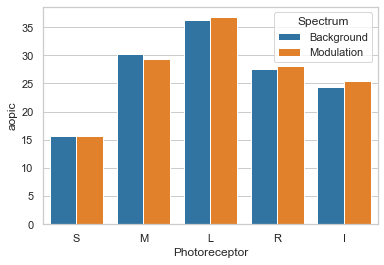

[ 0.8274564   0.64684905  0.69158845  0.31691306  0.32136833  0.75108725
  0.88749695  0.56781085  0.68744809  0.58285013  0.34923973  0.89430554
  0.79744455  0.21434778  0.89777724  0.63593291  0.4267372   0.9395464
  0.65777965  0.91573185]


KeyboardInterrupt: 

In [6]:
from scipy.optimize import NonlinearConstraint

# A random starting point for the optimisation
x0 = np.random.rand(1, 20)[0] 

# Set up problem
op = OptimisationProblem(device.aopic)

# Requires the special constraint format
c = NonlinearConstraint(fun=lambda x: op.cone_contrast_constraint_function(x), 
                        lb=0, ub=0)

# The bounds should be between 0-1, otherwise we are outside the
# gamut of the device
bounds = [(0, 1.),] * 20

# Plotting func for call back
def plot_solution(background, modulation):
    df = (
        pd.concat([background, modulation], axis=1)
        .T.melt(
            value_name='aopic',
            var_name='Photoreceptor',
            ignore_index=False)
        .reset_index()
        .rename(
            columns={'index': 'Spectrum'})
         )
    fig = sns.barplot(data=df, x='Photoreceptor', y='aopic', hue='Spectrum')
    plt.show()
    
# Callback function to give info on all minima found 
def print_fun(xk, convergence=0):
    bg, mod = op.smlri_calculator(xk)
    plot_solution(bg, mod)
    print(xk)

# Do differential evolution
differential_evolution(
    func=op.objective_function,
    bounds=bounds,
    args=(),
    strategy='best1bin',
    maxiter=1000,
    popsize=15,
    tol=0.01,
    mutation=(0.5, 1),
    recombination=0.7,
    seed=None,
    callback=print_fun,
    disp=True,
    polish=True,
    init='latinhypercube',
    atol=0,
    updating='immediate',
    workers=1,
    constraints=c,
    x0=x0,
)